In [1]:
import numpy as np
import pandas as pd
import ast
import statsmodels.api as sm
import sqlite3
import datetime

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.colors
mpl.lines
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
klm_sentiment = pd.read_csv('Full datasets/Sentiment all airlines/KLM.csv', encoding = 'utf-16')
ba_sentiment = pd.read_csv('Full datasets/Sentiment all airlines/BritishAir.csv', encoding = 'utf-16')
aa_sentiment = pd.read_csv('Full datasets/Sentiment all airlines/AmericanAir.csv', encoding = 'utf-16')
ej_sentiment = pd.read_csv('Full datasets/Sentiment all airlines/EasyJet.csv', encoding = 'utf-16')
ra_sentiment = pd.read_csv('Full datasets/Sentiment all airlines/Ryanair.csv', encoding = 'utf-16')
af_sentiment = pd.read_csv('Full datasets/Sentiment all airlines/AirFrance.csv', encoding = 'utf-16')
lu_sentiment = pd.read_csv('Full datasets/Sentiment all airlines/Lufthansa.csv', encoding = 'utf-16')
de_sentiment = pd.read_csv('Full datasets/Sentiment all airlines/Delta.csv', encoding = 'utf-16')
un_sentiment = pd.read_csv('Full datasets/Sentiment all airlines/UnitedAir.csv', encoding = 'utf-16')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,3,4,5,6,11,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler

In [10]:
klm_sentiment_langgroup[['sentiment']].mean()

,sentiment
lang,
en,0.284691
nl,0.005509


In [17]:
klm_sentiment = klm_sentiment.dropna(subset=['sentiment']).astype({'sentiment':str}).reset_index()
ba_sentiment = ba_sentiment.dropna(subset=['sentiment']).astype({'sentiment':str}).reset_index()
aa_sentiment = aa_sentiment.dropna(subset=['sentiment']).astype({'sentiment':str}).reset_index()
ej_sentiment = ej_sentiment.dropna(subset=['sentiment']).astype({'sentiment':str}).reset_index()
ra_sentiment = ra_sentiment.dropna(subset=['sentiment']).astype({'sentiment':str}).reset_index()
af_sentiment = af_sentiment.dropna(subset=['sentiment']).astype({'sentiment':str}).reset_index()
lu_sentiment = lu_sentiment.dropna(subset=['sentiment']).astype({'sentiment':str}).reset_index()
de_sentiment = de_sentiment.dropna(subset=['sentiment']).astype({'sentiment':str}).reset_index()
un_sentiment = un_sentiment.dropna(subset=['sentiment']).astype({'sentiment':str}).reset_index()

In [ ]:
klm_sentiment = klm_sentiment.replace('1.0', 'Positive')
klm_sentiment = klm_sentiment.replace(['0.0909090909091', '0.111111111111', '0.142857142857', '0.2', '0.25', '0.333333333333',
                                     '0.428571428571', '0.5', '0.555555555556', '0.6', '0.666666666667', '0.714285714286',
                                     '0.75', '0.777777777778', '0.8'], 'Partially positive')
klm_sentiment = klm_sentiment.replace('0.0', 'Neutral')
klm_sentiment = klm_sentiment.replace(['-0.111111111111', '-0.142857142857', '-0.2', '-0.25', '-0.272727272727', '-0.333333333333',
                                     '-0.4', '-0.428571428571', '-0.5', '-0.555555555556', '-0.6', '-0.636363636364',
                                     '-0.666666666667', '-0.714285714286', '-0.75', '-0.777777777778'], 'Partially negative')
klm_sentiment = klm_sentiment.replace('-1.0', 'Negative')

In [19]:
klm_sentiment = sentiment_converter(klm_sentiment)
ba_sentiment = sentiment_converter(ba_sentiment)
aa_sentiment = sentiment_converter(aa_sentiment)
ej_sentiment = sentiment_converter(ej_sentiment)
ra_sentiment = sentiment_converter(ra_sentiment)
af_sentiment = sentiment_converter(af_sentiment)
lu_sentiment = sentiment_converter(lu_sentiment)
de_sentiment = sentiment_converter(de_sentiment)
un_sentiment = sentiment_converter(un_sentiment)

In [20]:
counts_df = pd.DataFrame(klm_sentiment.groupby('sentiment').size())
counts_df.columns = ['KLM']

In [18]:
def sentiment_converter(df):
    '''Takes an airline sentiment dataframe and converts the string representations of the scores into positive/neutral/
    negative etcetera.'''
    
    df = df.replace('1.0', 'Positive')
    df = df.replace(['0.0909090909091', '0.111111111111', '0.142857142857', '0.2', '0.25', '0.333333333333',
                                     '0.428571428571', '0.5', '0.555555555556', '0.6', '0.666666666667', '0.714285714286',
                                     '0.75', '0.777777777778', '0.8'], 'Partially positive')
    df = df.replace('0.0', 'Neutral')
    df = df.replace(['-0.111111111111', '-0.142857142857', '-0.2', '-0.25', '-0.272727272727', '-0.333333333333',
                                     '-0.4', '-0.428571428571', '-0.5', '-0.555555555556', '-0.6', '-0.636363636364',
                                     '-0.666666666667', '-0.714285714286', '-0.75', '-0.777777777778'], 'Partially negative')
    df = df.replace('-1.0', 'Negative')
    
    return(df)

In [21]:
counts_df['BA'] = ba_sentiment.groupby('sentiment').size()
counts_df['AmericanAir'] = aa_sentiment.groupby('sentiment').size()
counts_df['EasyJet'] = ej_sentiment.groupby('sentiment').size()
counts_df['RyanAir'] = ra_sentiment.groupby('sentiment').size()
counts_df['AirFrance'] = af_sentiment.groupby('sentiment').size()
counts_df['Lufthansa'] = lu_sentiment.groupby('sentiment').size()
counts_df['Delta'] = de_sentiment.groupby('sentiment').size()
counts_df['UnitedAir'] = un_sentiment.groupby('sentiment').size()
counts_df

,KLM,BA,AmericanAir,EasyJet,RyanAir,AirFrance,Lufthansa,Delta,UnitedAir
sentiment,,,,,,,,,
Negative,25568,120848,43113,43113,31252,12832,13062,3982,2675
Neutral,94720,246683,67100,67100,81493,26421,35766,8811,5464
Partially negative,8702,7337,3523,3523,2108,1509,770,389,200
Partially positive,7100,6322,2056,2056,1567,1062,661,327,198
Positive,70567,121846,24700,24700,28795,11487,12278,3806,2751


In [22]:
counts_df = counts_df.T
counts_df

sentiment,Negative,Neutral,Partially negative,Partially positive,Positive
KLM,25568,94720,8702,7100,70567
BA,120848,246683,7337,6322,121846
AmericanAir,43113,67100,3523,2056,24700
EasyJet,43113,67100,3523,2056,24700
RyanAir,31252,81493,2108,1567,28795
AirFrance,12832,26421,1509,1062,11487
Lufthansa,13062,35766,770,661,12278
Delta,3982,8811,389,327,3806
UnitedAir,2675,5464,200,198,2751


In [23]:
cols = counts_df.columns.tolist()
cols_correct = [cols[0]] + [cols[2]] + [cols[1]] + [cols[3]] + [cols[4]]
cols_correct

['Negative', 'Partially negative', 'Neutral', 'Partially positive', 'Positive']

In [24]:
counts_df = counts_df[cols_correct]
counts_df

sentiment,Negative,Partially negative,Neutral,Partially positive,Positive
KLM,25568,8702,94720,7100,70567
BA,120848,7337,246683,6322,121846
AmericanAir,43113,3523,67100,2056,24700
EasyJet,43113,3523,67100,2056,24700
RyanAir,31252,2108,81493,1567,28795
AirFrance,12832,1509,26421,1062,11487
Lufthansa,13062,770,35766,661,12278
Delta,3982,389,8811,327,3806
UnitedAir,2675,200,5464,198,2751


In [25]:
counts_df['sum_absolute'] = counts_df.iloc[:, :].sum(axis=1)
counts_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


sentiment,Negative,Partially negative,Neutral,Partially positive,Positive,sum_absolute
KLM,25568,8702,94720,7100,70567,206657
BA,120848,7337,246683,6322,121846,503036
AmericanAir,43113,3523,67100,2056,24700,140492
EasyJet,43113,3523,67100,2056,24700,140492
RyanAir,31252,2108,81493,1567,28795,145215
AirFrance,12832,1509,26421,1062,11487,53311
Lufthansa,13062,770,35766,661,12278,62537
Delta,3982,389,8811,327,3806,17315
UnitedAir,2675,200,5464,198,2751,11288


In [26]:
counts_df['Negative %'] = (counts_df['Negative'] / counts_df['sum_absolute']) * 100
counts_df['Partially negative %'] = (counts_df['Partially negative'] / counts_df['sum_absolute']) * 100
counts_df['Neutral %'] = (counts_df['Neutral'] / counts_df['sum_absolute']) * 100
counts_df['Partially positive %'] = (counts_df['Partially positive'] / counts_df['sum_absolute']) * 100
counts_df['Positive %'] = (counts_df['Positive'] / counts_df['sum_absolute']) * 100
counts_df['sum_%'] = counts_df.iloc[:, 6:].sum(axis=1)
counts_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

sentiment,Negative,Partially negative,Neutral,Partially positive,Positive,sum_absolute,Negative %,Partially negative %,Neutral %,Partially positive %,Positive %,sum_%
KLM,25568,8702,94720,7100,70567,206657,12.372192,4.210842,45.834402,3.435645,34.146920,100.0
BA,120848,7337,246683,6322,121846,503036,24.023728,1.458544,49.038836,1.256769,24.222123,100.0
AmericanAir,43113,3523,67100,2056,24700,140492,30.687157,2.507616,47.760727,1.463429,17.581072,100.0
EasyJet,43113,3523,67100,2056,24700,140492,30.687157,2.507616,47.760727,1.463429,17.581072,100.0
RyanAir,31252,2108,81493,1567,28795,145215,21.521193,1.451641,56.118858,1.079090,19.829219,100.0
AirFrance,12832,1509,26421,1062,11487,53311,24.070079,2.830560,49.560128,1.992084,21.547148,100.0
Lufthansa,13062,770,35766,661,12278,62537,20.886835,1.231271,57.191742,1.056974,19.633177,100.0
Delta,3982,389,8811,327,3806,17315,22.997401,2.246607,50.886515,1.888536,21.980941,100.0
UnitedAir,2675,200,5464,198,2751,11288,23.697732,1.771793,48.405386,1.754075,24.371013,100.0


In [32]:
counts_df = counts_df.sort_values(by=['Negative %'], ascending=False)
counts_df

sentiment,Negative,Partially negative,Neutral,Partially positive,Positive,sum_absolute,Negative %,Partially negative %,Neutral %,Partially positive %,Positive %,sum_%
AmericanAir,43113,3523,67100,2056,24700,140492,30.687157,2.507616,47.760727,1.463429,17.581072,100.0
EasyJet,43113,3523,67100,2056,24700,140492,30.687157,2.507616,47.760727,1.463429,17.581072,100.0
AirFrance,12832,1509,26421,1062,11487,53311,24.070079,2.830560,49.560128,1.992084,21.547148,100.0
BA,120848,7337,246683,6322,121846,503036,24.023728,1.458544,49.038836,1.256769,24.222123,100.0
UnitedAir,2675,200,5464,198,2751,11288,23.697732,1.771793,48.405386,1.754075,24.371013,100.0
Delta,3982,389,8811,327,3806,17315,22.997401,2.246607,50.886515,1.888536,21.980941,100.0
RyanAir,31252,2108,81493,1567,28795,145215,21.521193,1.451641,56.118858,1.079090,19.829219,100.0
Lufthansa,13062,770,35766,661,12278,62537,20.886835,1.231271,57.191742,1.056974,19.633177,100.0
KLM,25568,8702,94720,7100,70567,206657,12.372192,4.210842,45.834402,3.435645,34.146920,100.0


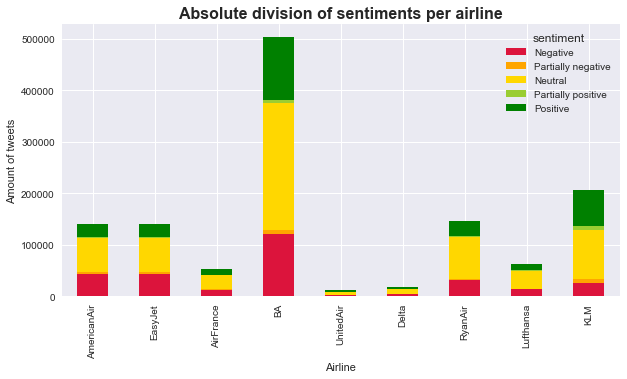

In [33]:
ax_1 = counts_df[['Negative', 'Partially negative', 'Neutral', 'Partially positive', 'Positive']].plot.bar(stacked=True, 
                                                    color=['crimson', 'orange', 'gold', 'yellowgreen', 'green'])
ax_1.set_title('Absolute division of sentiments per airline', size=16, weight='bold')
ax_1.set_xlabel('Airline')
ax_1.set_ylabel('Amount of tweets');

In [32]:
ax_1.get_figure().savefig('Absolute division sentiments.png', bbox_inches='tight')

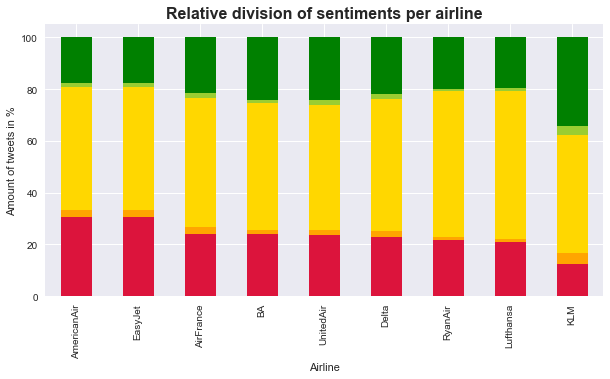

In [34]:
ax_2 = counts_df[['Negative %', 'Partially negative %', 'Neutral %', 'Partially positive %', 'Positive %']].plot.bar(
    stacked=True, color=['crimson', 'orange', 'gold', 'yellowgreen', 'green'])
ax_2.set_title('Relative division of sentiments per airline', size=16, weight='bold')
ax_2.set_xlabel('Airline')
ax_2.set_ylabel('Amount of tweets in %')
ax_2.legend('');

In [30]:
ax_2.get_figure().savefig('Relative vertical stacked sentiments.png', bbox_inches='tight')

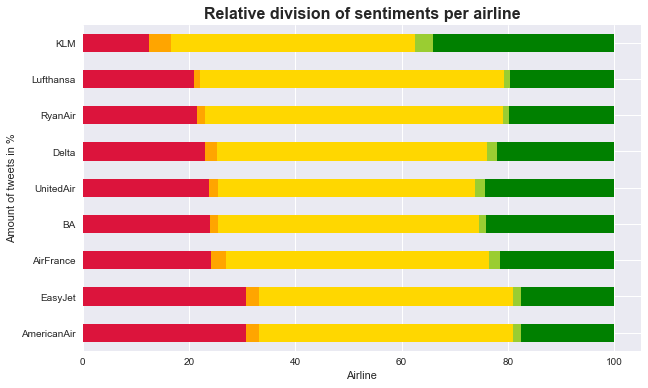

In [35]:
ax_3 = counts_df[['Negative %', 'Partially negative %', 'Neutral %', 'Partially positive %', 'Positive %']].plot.barh(
    stacked=True, color=['crimson', 'orange', 'gold', 'yellowgreen', 'green'], figsize=(10,6))
ax_3.set_title('Relative division of sentiments per airline', size=16, weight='bold')
ax_3.set_xlabel('Airline')
ax_3.set_ylabel('Amount of tweets in %')
ax_3.legend('');

In [37]:
ax_3.get_figure().savefig('Relative horizontal stacked sentiments.png', bbox_inches='tight')

In [3]:
def add_dates(df, column : str):
    '''Takes a column with a date, changes this into a datetime object and then substracts all elements of this object and 
    adds them all to seperate columns.'''
    
    df[column] = pd.to_datetime(df[column], errors='coerce')
    
    df['weekday'] = df[column].dt.weekday
    df['hour'] = df[column].dt.hour
    df['month'] = df[column].dt.month
    df['year'] = df[column].dt.year
    df['day'] = df[column].dt.day
    
    df_ints = df.dropna(subset=['day', 'hour']).astype({'day':int, 'hour':int})
    
    return(df_ints)

In [4]:
ba_sentiment = add_dates(ba_sentiment, 'created_at')
klm_sentiment = add_dates(klm_sentiment, 'created_at')

In [11]:
def to_matrix(df):
    '''Groups the data in the given dataset by day and hour, counts the values per hour of the day and converts these values
    into a matrix.'''
    
    df_grouped = df.groupby(['hour', 'sentiment']).count().reset_index()
    df_matrix = df_grouped.pivot('hour', 'sentiment', 'text')
    df_matrix_clean = df_matrix.fillna(0)
    
    return(df_matrix_clean)

In [12]:
ba_sentiment_matrix = to_matrix(ba_sentiment)
klm_sentiment_matrix = to_matrix(klm_sentiment)

In [44]:
ba_sentiment_pos = ba_sentiment[ba_sentiment['sentiment'] == 'Positive']
ba_sentiment_partpos = ba_sentiment[ba_sentiment['sentiment'] == 'Partially positive']
ba_sentiment_neutral = ba_sentiment[ba_sentiment['sentiment'] == 'Neutral']
ba_sentiment_partneg = ba_sentiment[ba_sentiment['sentiment'] == 'Partially negative']
ba_sentiment_neg = ba_sentiment[ba_sentiment['sentiment'] == 'Negative']

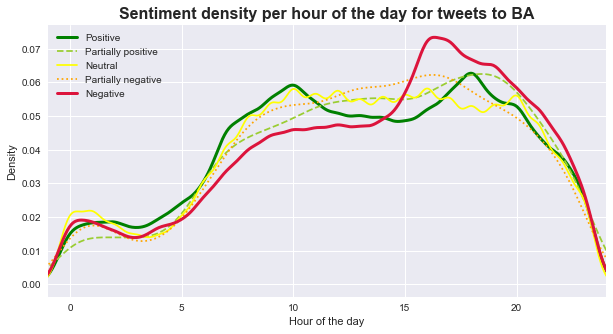

In [50]:
ax_4 = ba_sentiment_pos['hour'].plot(kind='density', color='green', linewidth=3)
ba_sentiment_partpos['hour'].plot(kind='density', ax=ax_4, color='yellowgreen', linestyle='--')
ba_sentiment_neutral['hour'].plot(kind='density', ax=ax_4, color='yellow')
ba_sentiment_partneg['hour'].plot(kind='density', ax=ax_4, color='orange', linestyle=':')
ba_sentiment_neg['hour'].plot(kind='density', ax=ax_4, color='crimson', linewidth=3)
ax_4.set_title('Sentiment density per hour of the day for tweets to BA', size=16, weight='bold')
ax_4.set_xlim(-1, 24)
ax_4.set_xlabel('Hour of the day')
ax_4.legend(['Positive', 'Partially positive', 'Neutral', 'Partially negative', 'Negative']);

In [53]:
ax_4.get_figure().savefig('Sentiment density hourly BA.png')

In [55]:
klm_sentiment_pos = klm_sentiment[klm_sentiment['sentiment'] == 'Positive']
klm_sentiment_partpos = klm_sentiment[klm_sentiment['sentiment'] == 'Partially positive']
klm_sentiment_neutral = klm_sentiment[klm_sentiment['sentiment'] == 'Neutral']
klm_sentiment_partneg = klm_sentiment[klm_sentiment['sentiment'] == 'Partially negative']
klm_sentiment_neg = klm_sentiment[klm_sentiment['sentiment'] == 'Negative']

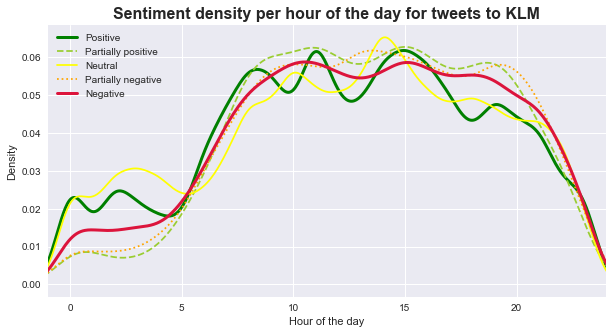

In [56]:
ax_5 = klm_sentiment_pos['hour'].plot(kind='density', color='green', linewidth=3)
klm_sentiment_partpos['hour'].plot(kind='density', ax=ax_5, color='yellowgreen', linestyle='--')
klm_sentiment_neutral['hour'].plot(kind='density', ax=ax_5, color='yellow')
klm_sentiment_partneg['hour'].plot(kind='density', ax=ax_5, color='orange', linestyle=':')
klm_sentiment_neg['hour'].plot(kind='density', ax=ax_5, color='crimson', linewidth=3)
ax_5.set_title('Sentiment density per hour of the day for tweets to KLM', size=16, weight='bold')
ax_5.set_xlim(-1, 24)
ax_5.set_xlabel('Hour of the day')
ax_5.legend(['Positive', 'Partially positive', 'Neutral', 'Partially negative', 'Negative']);

In [57]:
ax_5.get_figure().savefig('Sentiment density hourly KLM.png')

In [7]:
ba_sentiment_grouped = ba_sentiment.groupby('hour')
klm_sentiment_grouped = klm_sentiment.groupby('hour')

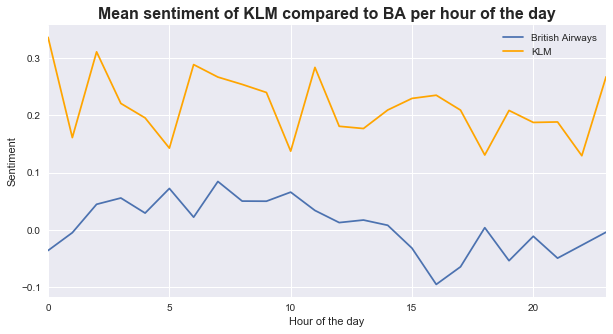

In [16]:
ax_6 = ba_sentiment_grouped['sentiment'].mean().plot(kind='line')
klm_sentiment_grouped['sentiment'].mean().plot(kind='line', color='orange', ax=ax_6)
ax_6.set_title('Mean sentiment of KLM compared to BA per hour of the day', size=16, weight='bold')
ax_6.set_xlabel('Hour of the day')
ax_6.set_ylabel('Sentiment')
ax_6.legend(['British Airways', 'KLM']);

In [17]:
ax_6.get_figure().savefig('Mean sentiment KLM BA per hour.png')

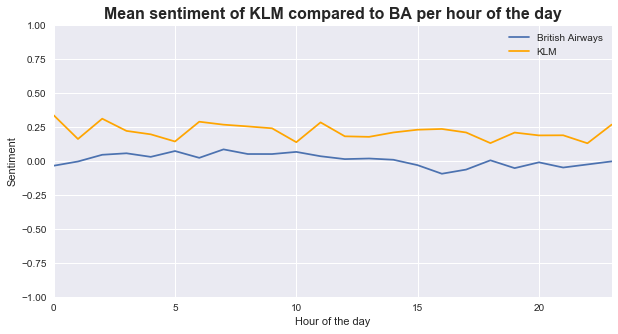

In [18]:
ax_7 = ba_sentiment_grouped['sentiment'].mean().plot(kind='line')
klm_sentiment_grouped['sentiment'].mean().plot(kind='line', color='orange', ax=ax_7)
ax_7.set_title('Mean sentiment of KLM compared to BA per hour of the day', size=16, weight='bold')
ax_7.set_xlabel('Hour of the day')
ax_7.set_ylabel('Sentiment')
ax_7.set_ylim(-1, 1)
ax_7.legend(['British Airways', 'KLM']);

In [19]:
ax_7.get_figure().savefig('Mean sentiment KLM BA per hour real scale.png')